In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

In [7]:
# Test scores!
df = pd.read_csv("cfy04e4.dat", usecols=['r_all_rs', 'CNAME', 'CAMPUS'])
df = df.set_index('CAMPUS').add_suffix('_fourth')
df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'cfy04e4.dat'

In [32]:
# These are the schools that did the BEST job
df.sort_values(by='r_all_rs_fourth', ascending=False).head(10)

,CNAME_fourth,r_all_rs_fourth
CAMPUS,,
131001103,SARITA EL,2509.0
101912296,T H ROGERS EL,2480.0
57905115,HARRELL BUDD EL,2470.0
180901101,MIMI FARLEY ELE,2448.0
68901118,EL MAGNET AT RE,2432.0
57909122,WALNUT GLEN ACA,2430.0
57916123,PRAIRIE CREEK E,2426.0
57916128,BRENTFIELD EL,2425.0
57911102,BRADFIELD ELEME,2425.0


In [33]:
third_graders = pd.read_csv("cfy03e3.dat", usecols=['CAMPUS', 'r_all_rs'])
third_graders = third_graders.set_index('CAMPUS').add_suffix('_third')
merged = df.join(third_graders)
merged = merged.dropna()
merged

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third
CAMPUS,,,
1902103,CAYUGA EL,2392.0,2330.0
1903101,ELKHART EL,2263.0,2285.0
1904102,FRANKSTON EL,2242.0,2299.0
1906102,NECHES EL,2218.0,2236.0
1907110,STORY EL,2200.0,2202.0
...,...,...,...
252903101,OLNEY EL,2193.0,2203.0
253901101,BENAVIDES EL,2109.0,2090.0
253901106,ZAPATA SOUTH EL,2172.0,2111.0


In [34]:
# Test scores!
third_2004_df = pd.read_csv("cfy04e3.dat", usecols=['r_all_rs', 'CNAME', 'CAMPUS'])
third_2004_df = third_2004_df.set_index('CAMPUS').add_suffix('_third_2004')
merged = merged.join(third_2004_df)
merged = merged.dropna()
merged.head(3)

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,CNAME_third_2004,r_all_rs_third_2004
CAMPUS,,,,,
1902103,CAYUGA EL,2392.0,2330.0,CAYUGA EL,2410.0
1903101,ELKHART EL,2263.0,2285.0,ELKHART EL,2256.0
1904102,FRANKSTON EL,2242.0,2299.0,FRANKSTON EL,2284.0


In [16]:
import statsmodels.formula.api as smf

# Let's see how well the third grade score predicts
# the fourth grade score
model = smf.ols("""
    r_all_rs_fourth ~ r_all_rs_third
""", data=merged)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        r_all_rs_fourth   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     6410.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:16:51   Log-Likelihood:                -17961.
No. Observations:                3501   AIC:                         3.593e+04
Df Residuals:                    3499   BIC:                         3.594e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        632.6929     19.936     31.736      0.000     593.606     671.780
r_all_rs_third     0.7094      0.009     80.061      0.000       0.692       0.727
==============================================================================
Omnibus:                      263.054   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1312.900
Skew:                           0.147   Prob(JB):                    8.08e-286
Kurtosis:                       5.986   Cond. No.                     6.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# results.predict() will give us the prediction
merged['predicted_fourth'] = results.predict()
# results.resid will give us the difference between the actual value and the predicted value
# it's kind of like predicted_fourth - r_all_rs_fourth
merged['residual'] = results.resid
merged.head()

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,predicted_fourth,residual
CAMPUS,,,,,
1902103,CAYUGA EL,2392.0,2330.0,2285.616126,106.383874
1903101,ELKHART EL,2263.0,2285.0,2253.692715,9.307285
1904102,FRANKSTON EL,2242.0,2299.0,2263.624443,-21.624443
1906102,NECHES EL,2218.0,2236.0,2218.931668,-0.931668
1907110,STORY EL,2200.0,2202.0,2194.811757,5.188243


In [20]:
# Sorting by the difference between predicted score and actual score
# BUT IS IT REALLY THAT STRANGE???
merged.sort_values(by='residual', ascending=False)

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,predicted_fourth,residual
CAMPUS,,,,,
57905115,HARRELL BUDD EL,2470.0,2140.0,2150.828391,319.171609
123803101,TEKOA ACADEMY O,2313.0,2021.0,2066.408705,246.591295
15803101,HIGGS/CARTER/KI,2349.0,2097.0,2120.323799,228.676201
101912172,HENDERSON N EL,2324.0,2093.0,2117.486162,206.513838
180901101,MIMI FARLEY ELE,2448.0,2294.0,2260.077397,187.922603
...,...,...,...,...,...
101840101,TWO DIMENSIONS,2076.0,2275.0,2246.598624,-170.598624
15819001,SHEKINAH RADIAN,1976.0,2149.0,2157.213074,-181.213074
101912140,DOGAN EL,1972.0,2150.0,2157.922483,-185.922483


In [21]:
# Compute the STANDARD DEVIATION OF THE ERROR!!!!
# residual = how wrong your prediction was
#     very high or low residual = probably cheating sometime
# standard deviation = "if we have a bunch of numbers, how weird is a given number?"
merged['error_std_dev'] = results.resid / np.sqrt(results.mse_resid)
merged.head()

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,predicted_fourth,residual,error_std_dev
CAMPUS,,,,,,
1902103,CAYUGA EL,2392.0,2330.0,2285.616126,106.383874,2.600187
1903101,ELKHART EL,2263.0,2285.0,2253.692715,9.307285,0.227484
1904102,FRANKSTON EL,2242.0,2299.0,2263.624443,-21.624443,-0.528535
1906102,NECHES EL,2218.0,2236.0,2218.931668,-0.931668,-0.022771
1907110,STORY EL,2200.0,2202.0,2194.811757,5.188243,0.126809


In [24]:
# If sort by error_std_dev, we are answering the question
# "these are the most weird scores" - whether high or low
# and anything over.... 2? is kind of weird? or worth looking at.
merged.sort_values(by='error_std_dev', ascending=False)

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,predicted_fourth,residual,error_std_dev
CAMPUS,,,,,,
57905115,HARRELL BUDD EL,2470.0,2140.0,2150.828391,319.171609,7.801048
123803101,TEKOA ACADEMY O,2313.0,2021.0,2066.408705,246.591295,6.027073
15803101,HIGGS/CARTER/KI,2349.0,2097.0,2120.323799,228.676201,5.589200
101912172,HENDERSON N EL,2324.0,2093.0,2117.486162,206.513838,5.047518
180901101,MIMI FARLEY ELE,2448.0,2294.0,2260.077397,187.922603,4.593119
...,...,...,...,...,...,...
101840101,TWO DIMENSIONS,2076.0,2275.0,2246.598624,-170.598624,-4.169694
15819001,SHEKINAH RADIAN,1976.0,2149.0,2157.213074,-181.213074,-4.429128
101912140,DOGAN EL,1972.0,2150.0,2157.922483,-185.922483,-4.544233


In [25]:
import statsmodels.formula.api as smf

# Let's see how well the third grade score predicts
# the fourth grade score
model = smf.ols("""
    r_all_rs_third ~ r_all_rs_fourth
""", data=merged)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         r_all_rs_third   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     6410.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:28:19   Log-Likelihood:                -18400.
No. Observations:                3501   AIC:                         3.680e+04
Df Residuals:                    3499   BIC:                         3.682e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.0766     25.386      8.551      0.000     167.304     266.849
r_all_rs_fourth     0.9119      0.011     80.061      0.000       0.890       0.934
==============================================================================
Omnibus:                      339.591   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1204.709
Skew:                          -0.455   Prob(JB):                    2.52e-262
Kurtosis:                       5.726   Cond. No.                     7.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Compute the STANDARD DEVIATION OF THE ERROR!!!!
# residual = how wrong your prediction was
#     very high or low residual = probably cheating sometime
# standard deviation = "if we have a bunch of numbers, how weird is a given number?"
merged['error_std_dev_third'] = results.resid / np.sqrt(results.mse_resid)
merged.head()

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,predicted_fourth,residual,error_std_dev,error_std_dev_third
CAMPUS,,,,,,,
1902103,CAYUGA EL,2392.0,2330.0,2285.616126,106.383874,2.600187,-1.471090
1903101,ELKHART EL,2263.0,2285.0,2253.692715,9.307285,0.227484,0.094676
1904102,FRANKSTON EL,2242.0,2299.0,2263.624443,-21.624443,-0.528535,0.809311
1906102,NECHES EL,2218.0,2236.0,2218.931668,-0.931668,-0.022771,-0.077066
1907110,STORY EL,2200.0,2202.0,2194.811757,5.188243,0.126809,-0.456203


In [27]:
# If sort by error_std_dev, we are answering the question
# "these are the most weird scores" - whether high or low
# and anything over.... 2? is kind of weird? or worth looking at.
merged.sort_values(by='error_std_dev_third', ascending=False)

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,predicted_fourth,residual,error_std_dev,error_std_dev_third
CAMPUS,,,,,,,
139908101,ROXTON EL,2130.0,2388.0,2326.761855,-196.761855,-4.809164,4.929698
105802041,SAN MARCOS PREP,2025.0,2245.0,2225.316350,-200.316350,-4.896042,3.910961
90905101,GRANDVIEW-HOPKI,2149.0,2346.0,2296.966672,-147.966672,-3.616535,3.650748
108912110,JOSE DE ESCANDO,2166.0,2360.0,2306.898400,-140.898400,-3.443775,3.618377
226903111,FT CONCHO EL,2196.0,2386.0,2325.343037,-129.343037,-3.161344,3.589150
...,...,...,...,...,...,...,...
57825001,PINNACLE SCHOOL,2274.0,2068.0,2099.750934,174.249066,4.258917,-4.799706
101912172,HENDERSON N EL,2324.0,2093.0,2117.486162,206.513838,5.047518,-5.243651
15803101,HIGGS/CARTER/KI,2349.0,2097.0,2120.323799,228.676201,5.589200,-5.648870


In [36]:
merged.head()

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,CNAME_third_2004,r_all_rs_third_2004
CAMPUS,,,,,
1902103,CAYUGA EL,2392.0,2330.0,CAYUGA EL,2410.0
1903101,ELKHART EL,2263.0,2285.0,ELKHART EL,2256.0
1904102,FRANKSTON EL,2242.0,2299.0,FRANKSTON EL,2284.0
1906102,NECHES EL,2218.0,2236.0,NECHES EL,2294.0
1907110,STORY EL,2200.0,2202.0,STORY EL,2256.0


In [37]:
import statsmodels.formula.api as smf

# Let's see how well the third grade score predicts
# the fourth grade score
model = smf.ols("""
    r_all_rs_fourth ~ r_all_rs_third_2004
""", data=merged)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        r_all_rs_fourth   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     3311.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:31:48   Log-Likelihood:                -18505.
No. Observations:                3482   AIC:                         3.701e+04
Df Residuals:                    3480   BIC:                         3.703e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             507.1965     29.917     16.953      0.000     448.540     565.853
r_all_rs_third_2004     0.7565      0.013     57.538      0.000       0.731       0.782
==============================================================================
Omnibus:                      181.744   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              588.818
Skew:                          -0.183   Prob(JB):                    1.38e-128
Kurtosis:                       4.981   Cond. No.                     8.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
merged['error_std_dev'] = results.resid / np.sqrt(results.mse_resid)
merged.sort_values(by='error_std_dev', ascending=False)

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,CNAME_third_2004,r_all_rs_third_2004,error_std_dev
CAMPUS,,,,,,
57905115,HARRELL BUDD EL,2470.0,2140.0,HARRELL BUDD EL,2160.0,6.683622
15803101,HIGGS/CARTER/KI,2349.0,2097.0,HIGGS/CARTER/KI,2113.0,4.946679
24801101,ENCINO SCHOOL,2328.0,2230.0,ENCINO SCHOOL,2093.0,4.827348
131001103,SARITA EL,2509.0,2424.0,SARITA EL,2355.0,4.477696
206903101,CHEROKEE ELEMEN,2334.0,2362.0,CHEROKEE ELEMEN,2170.0,3.765205
...,...,...,...,...,...,...
15815101,RADIANCE ACADEM,2060.0,2122.0,RADIANCE ACADEM,2341.0,-4.434377
101912103,ALLEN EL,2101.0,2159.0,ALLEN EL,2398.0,-4.477472
57920108,WILMER EL,2168.0,2240.0,WILMER EL,2501.0,-4.699424


In [46]:
!pip install seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [47]:
merged.head()

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third,CNAME_third_2004,r_all_rs_third_2004,error_std_dev
CAMPUS,,,,,,
1902103,CAYUGA EL,2392.0,2330.0,CAYUGA EL,2410.0,1.253501
1903101,ELKHART EL,2263.0,2285.0,ELKHART EL,2256.0,0.999387
1904102,FRANKSTON EL,2242.0,2299.0,FRANKSTON EL,2284.0,0.141908
1906102,NECHES EL,2218.0,2236.0,NECHES EL,2294.0,-0.499750
1907110,STORY EL,2200.0,2202.0,STORY EL,2256.0,-0.281291


In [48]:
import seaborn as sns

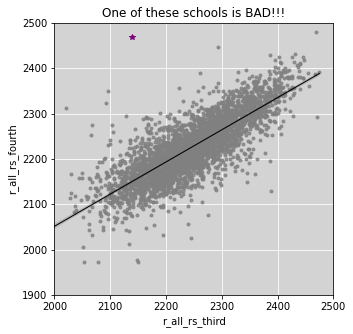

In [84]:
# 57905115	HARRELL BUDD EL	2470.0	2140.0	HARRELL BUDD EL	2160.0	6.683622

# Tell matplotlib to make an empty graphic
fig, ax = plt.subplots(figsize=(5,5))

# Set some options on it
ax.set_xlim(2000, 2500)
ax.set_ylim(1900, 2500)
ax.set_facecolor('lightgrey')
ax.grid(True, color='white')
ax.set_axisbelow(True)
ax.set_title("One of these schools is BAD!!!")

# Draw a graph inside of that empty graph space
sns.regplot(x='r_all_rs_third',
            y='r_all_rs_fourth',
            data=merged,
            marker='.',
            line_kws={'color': 'black', 'linewidth': 1 },
            scatter_kws={'color': 'grey'},
            ax=ax)

# Draw another graph ON TOP OF the existing graph
#plt.plot(2140, 2470, color='red', marker='o')

# or! we can pull out of datapoint
highlight = merged.loc[57905115]
plt.plot(highlight.r_all_rs_third, highlight.r_all_rs_fourth, color='purple', marker='*')
